# Binary classification (Trauma detection)

## Imports

In [ ]:
%load_ext autoreload
%autoreload 2

#########################################################################################
#########################################################################################
####### BEGIN OPTIONAL SECTION
#########################################################################################
#########################################################################################

GLB_INSTALL_DEPENDENCIES = True

# Here to define dependencies
if GLB_INSTALL_DEPENDENCIES:
    !pip install transformers
    !pip install torch
    !pip install openpyxl

#########################################################################################
#########################################################################################
####### END OPTIONAL SECTION
#########################################################################################
#########################################################################################

In [ ]:
import pandas as pd
import torch
import numpy as np
import matplotlib.pyplot as plt
import json
import os
from os.path import join

%reload_ext autoreload
import src.classification_model_utilities as mlclassif_utilities
import src.general_utilities as gral_utilities

## Globals

In [ ]:
global_config_file = gral_utilities.read_config_file("config.yml")

PATH_DATASET = global_config_file["general_set_up"]["dataset_filename"]
PATH_DIR_LOGS = global_config_file["general_set_up"]["logs_dir_name"]
PATH_DIR_INPUT = global_config_file["general_set_up"]["input_dir_name"]
PATH_DIR_DATASET = global_config_file["general_set_up"]["dataset_dir_name"]
INDEX_COLUMNS_DATASET = global_config_file["dataset"]["index_columns_dataset"]
LIST_NAME_COLUMNS_DATASET = global_config_file["dataset"]["list_columns_names"]

## Dataset

df_dataset.shape (19104, 13)
Num of different classes in the dataset is 2 which are:
	 1 - 0
	 2 - 1


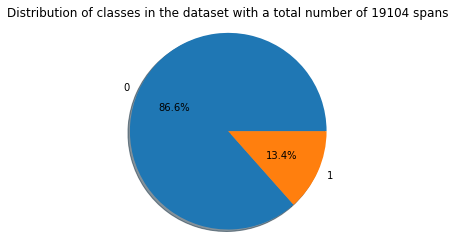

Distribution of classes 
    trauma   text
0       0  16536
1       1   2568


,tribunal,id_transcript,case,accused,date,text,trauma,role,witnesses,n_witnesses,start,id_annotation,id_document
105,ICTR,TRS16748R0000629886,ICTR-98-44-T,Callixte Nzabonimana,2006-02-22,"THE WITNESS: I do understand that, Mr. President.",0,Witness,[UB],1,37718,63d006eb97ad59b4cfc6291c,639a47b297ad59b4cfc56852
107,ICTR,TRS16748R0000629886,ICTR-98-44-T,Callixte Nzabonimana,2006-02-22,THE WITNESS: I received a copy of that decisio...,0,Witness,[UB],1,38079,63d006f697ad59b4cfc62921,639a47b297ad59b4cfc56852
109,ICTR,TRS16748R0000629886,ICTR-98-44-T,Callixte Nzabonimana,2006-02-22,THE WITNESS: After having been convicted by th...,0,Witness,[UB],1,38394,63d0071597ad59b4cfc62923,639a47b297ad59b4cfc56852
111,ICTR,TRS16748R0000629886,ICTR-98-44-T,Callixte Nzabonimana,2006-02-22,THE WITNESS: I have to date received no respon...,0,Witness,[UB],1,38851,63d0071c97ad59b4cfc62927,639a47b297ad59b4cfc56852
116,ICTR,TRS16748R0000629886,ICTR-98-44-T,Callixte Nzabonimana,2006-02-22,"THE WITNESS: Yes, I understood what he said.",0,Witness,[UB],1,39549,63d0073997ad59b4cfc62931,639a47b297ad59b4cfc56852


In [ ]:
df_dataset = mlclassif_utilities.import_dataset_from_excel(join(PATH_DIR_INPUT, PATH_DIR_DATASET, PATH_DATASET), INDEX_COLUMNS_DATASET, LIST_NAME_COLUMNS_DATASET)
print("df_dataset.shape", df_dataset.shape)

classes_dataset = mlclassif_utilities.get_unique_values_from_dataset(df_dataset, global_config_file["dataset"]["col_of_interest_binary_classif"])
print(f"Num of different classes in the dataset is {len(classes_dataset)} which are:")
for index, elem in enumerate(classes_dataset):
    print("\t", index+1, "-", elem)

distribution_classes = mlclassif_utilities.get_distribution_classes_from_dataset(
        df_dataset, 
        [global_config_file["dataset"]["col_of_interest_binary_classif"]], 
        global_config_file["dataset"]["col_of_reference_binary_classif"]
    )

labels = list(distribution_classes[global_config_file["dataset"]["col_of_interest_binary_classif"]])
sizes = list(distribution_classes[global_config_file["dataset"]["col_of_reference_binary_classif"]])

fig1, ax1 = plt.subplots()
ax1.set_title(f'Distribution of classes in the dataset with a total number of {distribution_classes[global_config_file["dataset"]["col_of_reference_binary_classif"]].sum()} spans')
ax1.pie(sizes, labels=labels, autopct='%2.1f%%', shadow=True, startangle=0)
ax1.axis('equal')

plt.show()

print(f"Distribution of classes", "\n", distribution_classes)

df_dataset.head()


# Train model

In [ ]:
%reload_ext autoreload
!python src/binary_classification.py